In [3]:
import nltk 
model  = nltk.parse.corenlp.CoreNLPServer('stanford-corenlp-4.2.0//stanford-corenlp-4.2.0.jar',
                                  'stanford-corenlp-4.2.0//stanford-corenlp-4.2.0-models.jar')


In [7]:
model.start()

In [1]:
from nltk.parse.corenlp import CoreNLPParser
from nltk.tree import Tree

In [2]:
string = "My English Instructor were a good teacher."
parser = CoreNLPParser()
parse = next(parser.raw_parse(string))
print(str(parse))

(ROOT
  (S
    (NP (PRP$ My) (JJ English) (NN Instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))


In [3]:
def parse_processing(string):
    #Tạo parse tree
    parser = CoreNLPParser()
    parse = next(parser.raw_parse(string))
    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse), 
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    #tree.pretty_print()
    return tree
tree = parse_processing(string)
print(tree)
tree

(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))


The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('ROOT', [Tree('S', [Tree('NP', [Tree('PRP$', ['my']), Tree('JJ', ['english']), Tree('NN', ['instructor'])]), Tree('VP', [Tree('VBD', ['were']), Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['good']), Tree('NN', ['teacher'])])]), Tree('.', ['.'])])])

2


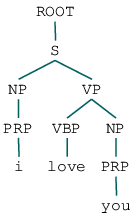

In [19]:
sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
print(len(tree[0]))
tree

In [20]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you 
4:  Ngôi thứ 3 số ít: he, she, it
5:   Ngôi thứ 3 số nhiều: they 
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''
def getNP_VP(tree):
    for i in range(len(tree[0])-1):
        if tree[0][i].label()=='NP' and tree[0][i+1].label()=='VP':
            return tree[0][i], tree[0][i+1]
    return 0,0
    

In [21]:
def get_subject_type(node):
    words = node.leaves()
    if 'i' in words:
        return 1
    elif 'we' in words:
        return 2
    elif 'you' in words:
        return 3
    elif len(set(words).intersection(['he','she','it']))>0:
        return 4
    elif 'they' in words:
        return 5
    else:
        return -1
    

In [22]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''
vdict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}
def get_verb_type(node):
    for sub in node.subtrees():
        k = sub.label()
        if k in vdict.keys():
            return vdict[k]
    return -1

In [23]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
match={1:[2],4:[3]}
def check_grammar(sent):
    tree = parse(sent)
    NP,VP = getNP_VP(tree)
    n = get_subject_type(NP)
    v = get_verb_type(VP) 
    if n in match.keys():
        if not v in match[n]:
            return 'error'
    return 'ok'

In [24]:
#sent = 'she want to go to school'
sent = 'she wants to go to school'
check_grammar(sent)

'ok'